# Correspondence analysis

Author: O. Roustant, INSA Toulouse. April 2022.

This notebook aims at illustrating the course of correspondence analysis. It is complementary to the course slides.

# Illustration on the velib data

We consider the ‘Vélib’ data set, related to the bike sharing system of Paris. The data are loading profiles of the bike stations over one week, collected every hour, from the period Monday 2nd Sept. - Sunday 7th Sept., 2014. The loading profile of a station, or simply loading, is defined as the ratio of number of available bikes divided by the number of bike docks. A loading of 1 means that the station is fully loaded, i.e. all bikes are available. A loading of 0 means that the station is empty, all bikes have been rent.

From the viewpoint of data analysis, the individuals are the stations. The variables are the 168 time steps (hours in the week). The aim is to detect clusters in the data, corresponding to common customer usages. This clustering should then be used to predict the loading profile.

In [1]:
rm(list = ls())   # erase everything, start from scratch!

load("velib.RData")

In [2]:
# data preparation
x <- as.matrix(velib$data)
colnames(x) <- 1:ncol(x)
rownames(x) <- velib$names

n <- nrow(x)
stations <- 1:n 
coord <- velib$position[stations,]

# select exactly 7 days of data (we remove the first 13 dates)
dates <- 14:181
x <- x[stations, dates]
colnames(x) <- 1:length(dates)

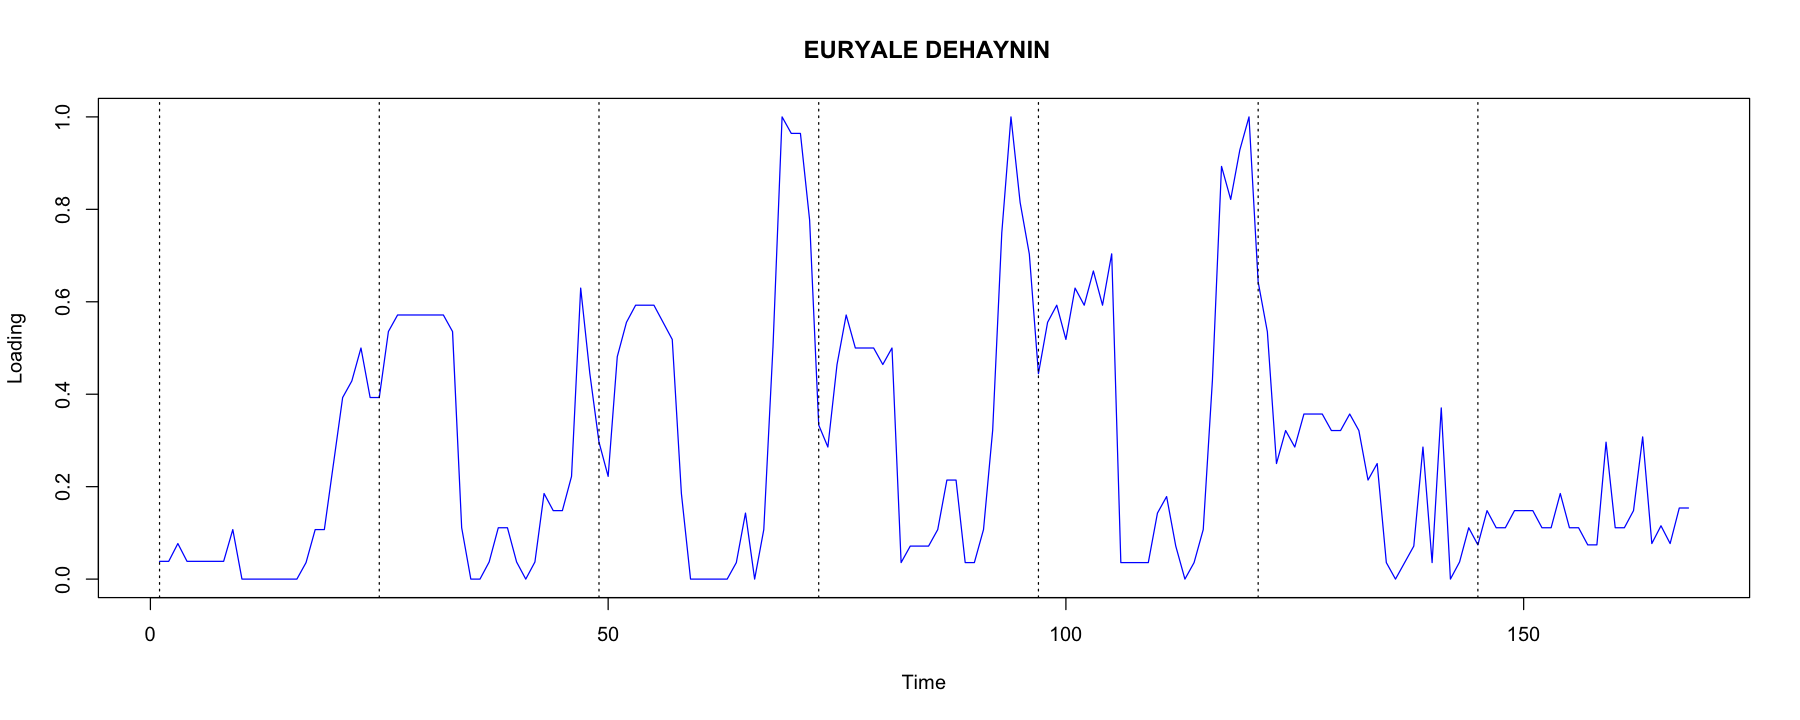

In [3]:
timeTick <- 1 + 24*(0:6)  # vector corresponding to the beginning of days
par(mfrow = c(1, 1))

options(repr.plot.width = 15, repr.plot.height = 6)

plot(x[1, ], col = "blue", type = "l", ylim = c(0, 1), 
     xlab = "Time", ylab = "Loading", main = rownames(x)[1])
abline(v = timeTick, lty = "dotted")


In [4]:
# From now on, we use numbers instead of station names, 
# in order to simplify printing
rownames(x) <- 1:nrow(x)

## Basic clustering

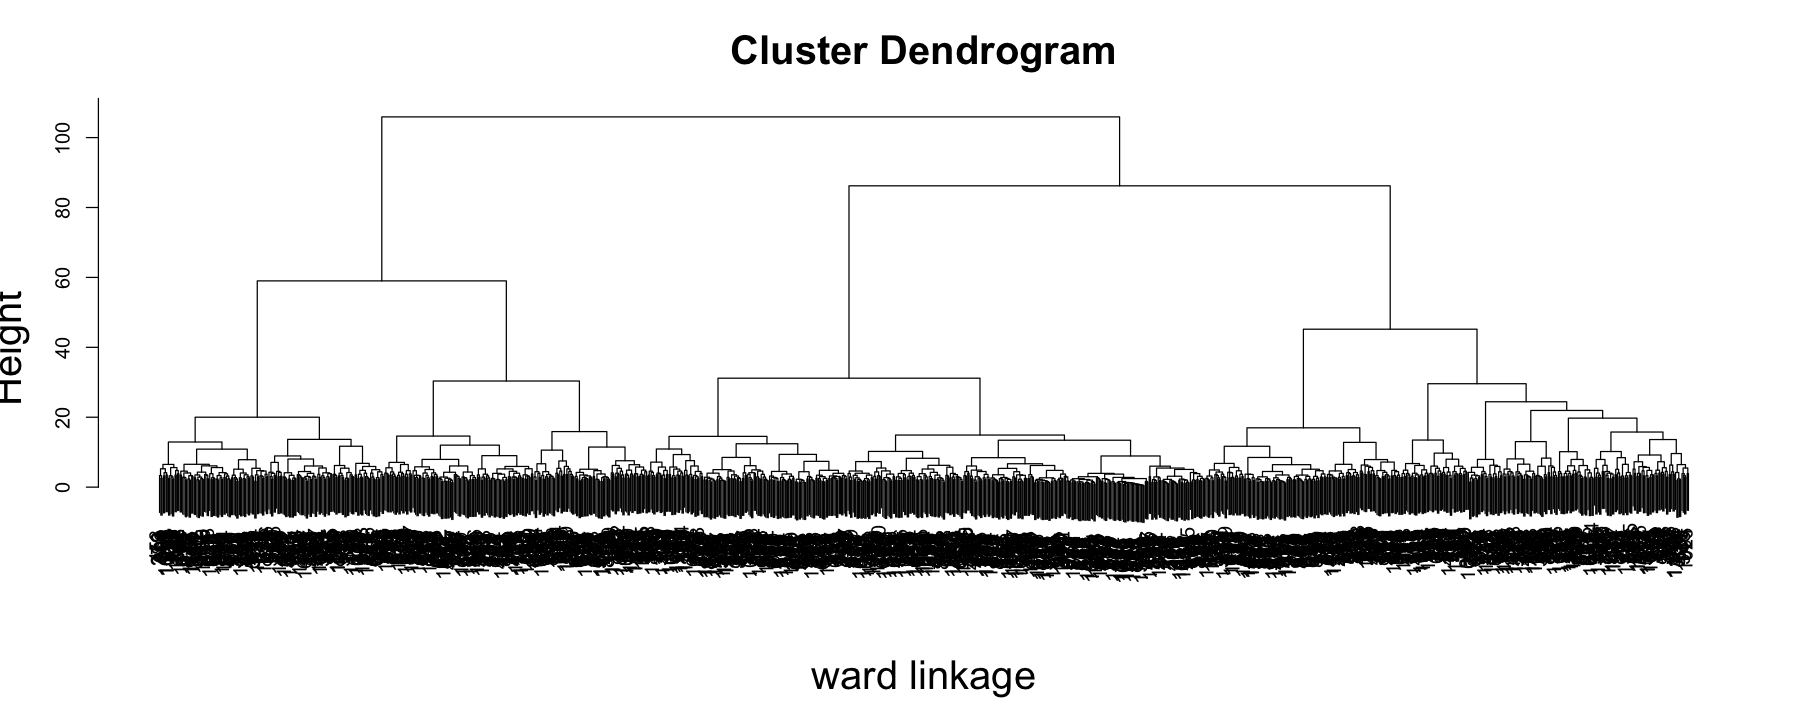

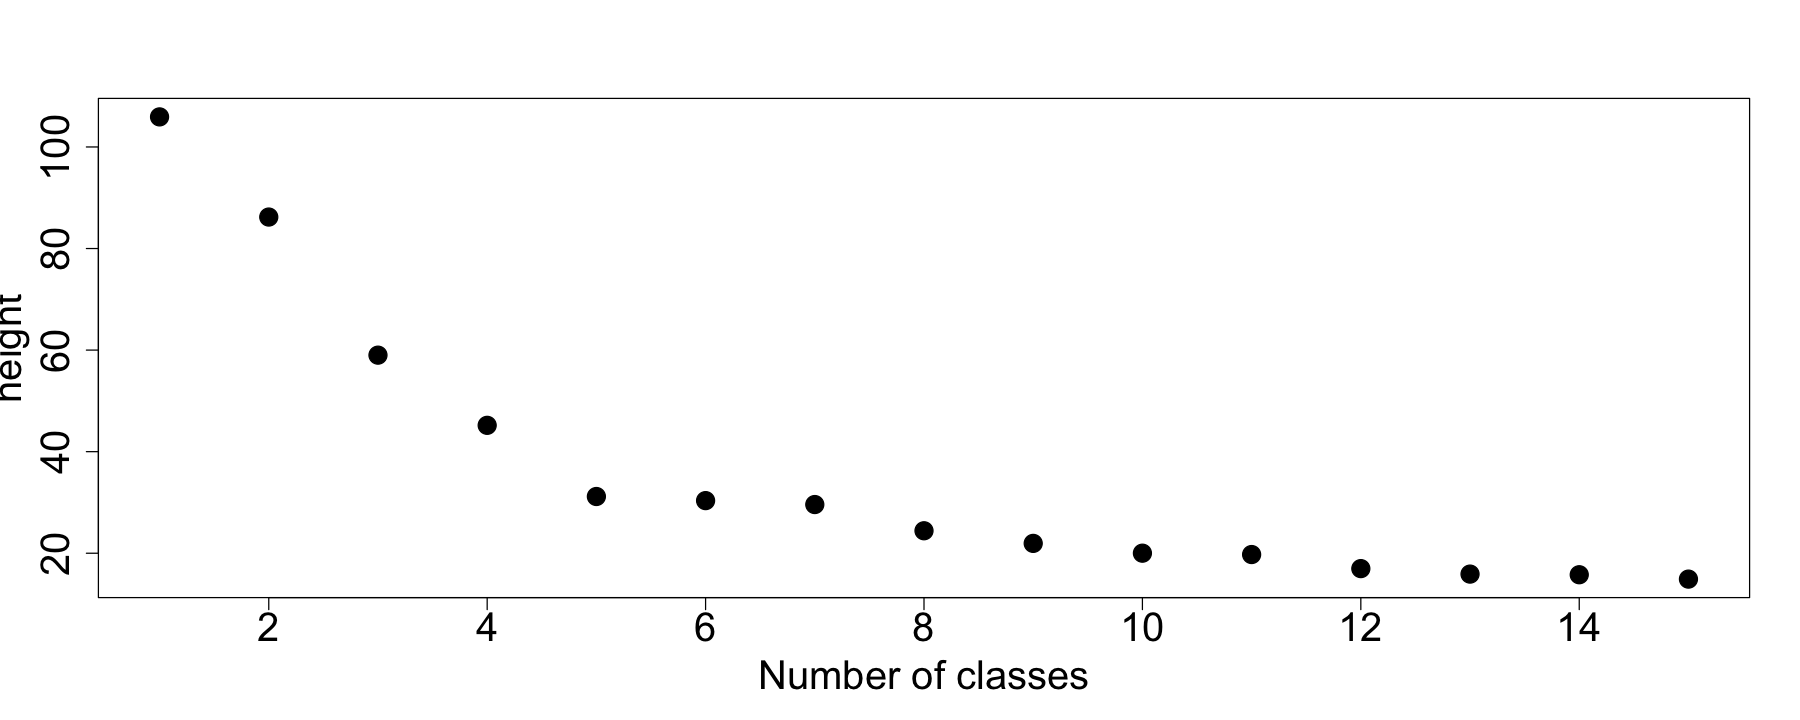

In [5]:
# hierarchical clustering
hc <- hclust(dist(x), method = "ward.D2")
plot(hc, xlab = "ward linkage", sub = "", cex.lab = 2, cex.main = 2)
plot(rev(hc$height)[1:15], xlab = "Number of classes", ylab = "height", 
     cex.lab = 2, cex.main = 2, cex.axis = 2, cex = 2, pch = 19)


In [6]:
# let us choose K clusters
K <- 5
reshc <- cutree(hc, k = K)

In [7]:
# k-means 
K2 <- 6
km <- kmeans(x, centers = K2, nstart = 20)
reskm <- km$cluster

In [8]:
# Comparison with a contingency table
tab <- table(reskm, reshc)
rownames(tab) <- paste("km", 1:K2, sep = "")
colnames(tab) <- paste("hc", 1:K, sep = "")
tab

     reshc
reskm hc1 hc2 hc3 hc4 hc5
  km1   0  37   6 142   0
  km2   0 135   2   8  10
  km3   0  11 283   2   0
  km4   0  16   0   0 131
  km5 117  15   0   0  61
  km6  58  10 142   0   3

## Correspondence analysis

In order to compare the clustering results, we use correspondence analysis, which is composed of two PCAs with the chi2 metric: one on the "profile rows", the other on the "profile columns". 

Let us build the profile rows: for each row, compute the percentage (with respect to the sum of the row values).

In [9]:
cat("Contingency table:\n")
tab
rowProf <- tab
for (i in 1:nrow(tab)){
    rowProf[i, ] <- tab[i, ] / sum(tab[i, ])
}
cat("\nRow profile table:\n\n")
print(rowProf, digits = 2);

cat("\nColumn frequencies (inverse weights for chi2 distance):\n")
rowSums(rowProf)
colsum <- colSums(tab) / sum(tab)
colsum

Contingency table:


     reshc
reskm hc1 hc2 hc3 hc4 hc5
  km1   0  37   6 142   0
  km2   0 135   2   8  10
  km3   0  11 283   2   0
  km4   0  16   0   0 131
  km5 117  15   0   0  61
  km6  58  10 142   0   3


Row profile table:

     reshc
reskm    hc1    hc2    hc3    hc4    hc5
  km1 0.0000 0.2000 0.0324 0.7676 0.0000
  km2 0.0000 0.8710 0.0129 0.0516 0.0645
  km3 0.0000 0.0372 0.9561 0.0068 0.0000
  km4 0.0000 0.1088 0.0000 0.0000 0.8912
  km5 0.6062 0.0777 0.0000 0.0000 0.3161
  km6 0.2723 0.0469 0.6667 0.0000 0.0141

Column frequencies (inverse weights for chi2 distance):


km1 km2 km3 km4 km5 km6 
  1   1   1   1   1   1

hc1       hc2       hc3       hc4       hc5 
0.1471825 0.1883936 0.3641716 0.1278385 0.1724138

Let us compute the chi2 distance between the first two rows: sum of squares weighted by the inverse of the column sum. Hence the coordinates associated with the fewest individuals have the largest weight.

In [10]:
for (i in 2:K){
    chi2Dist2 <- sum((rowProf[1, ] - rowProf[i, ])^2 / colsum)
    cat("\nsquared Chi2 distance between rows 1 and", i, ":", chi2Dist2)
}


squared Chi2 distance between rows 1 and 2 : 6.424531
squared Chi2 distance between rows 1 and 3 : 7.011245
squared Chi2 distance between rows 1 and 4 : 9.261749
squared Chi2 distance between rows 1 and 5 : 7.767174

Do the same for the columns

In [11]:
colProf <- tab
for (j in 1:ncol(tab)){
    colProf[, j] <- tab[, j] / sum(tab[, j])
}
tab; print(colProf, digits = 2)
rowSum <- rowSums(tab)
rowSum

     reshc
reskm hc1 hc2 hc3 hc4 hc5
  km1   0  37   6 142   0
  km2   0 135   2   8  10
  km3   0  11 283   2   0
  km4   0  16   0   0 131
  km5 117  15   0   0  61
  km6  58  10 142   0   3

     reshc
reskm    hc1    hc2    hc3    hc4    hc5
  km1 0.0000 0.1652 0.0139 0.9342 0.0000
  km2 0.0000 0.6027 0.0046 0.0526 0.0488
  km3 0.0000 0.0491 0.6536 0.0132 0.0000
  km4 0.0000 0.0714 0.0000 0.0000 0.6390
  km5 0.6686 0.0670 0.0000 0.0000 0.2976
  km6 0.3314 0.0446 0.3279 0.0000 0.0146


km1 km2 km3 km4 km5 km6 
185 155 296 147 193 213

Let us now perform a PCA of the row profiles with the chi2 metric, and a PCA of the colum profiles with the chi2 metric. We plot them simultaneously on the first PCA coordinates. Explain why they correspond. Interpret the results.

**Results of the Correspondence Analysis (CA)**
The row variable has  6  categories; the column variable has 5 categories
The chi square of independence between the two variables is equal to 2736.077 (p-value =  0 ).
*The results are available in the following objects:

   name              description                   
1  "$eig"            "eigenvalues"                 
2  "$col"            "results for the columns"     
3  "$col$coord"      "coord. for the columns"      
4  "$col$cos2"       "cos2 for the columns"        
5  "$col$contrib"    "contributions of the columns"
6  "$row"            "results for the rows"        
7  "$row$coord"      "coord. for the rows"         
8  "$row$cos2"       "cos2 for the rows"           
9  "$row$contrib"    "contributions of the rows"   
10 "$call"           "summary called parameters"   
11 "$call$marge.col" "weights of the columns"      
12 "$call$marge.row" "weights of the rows"         

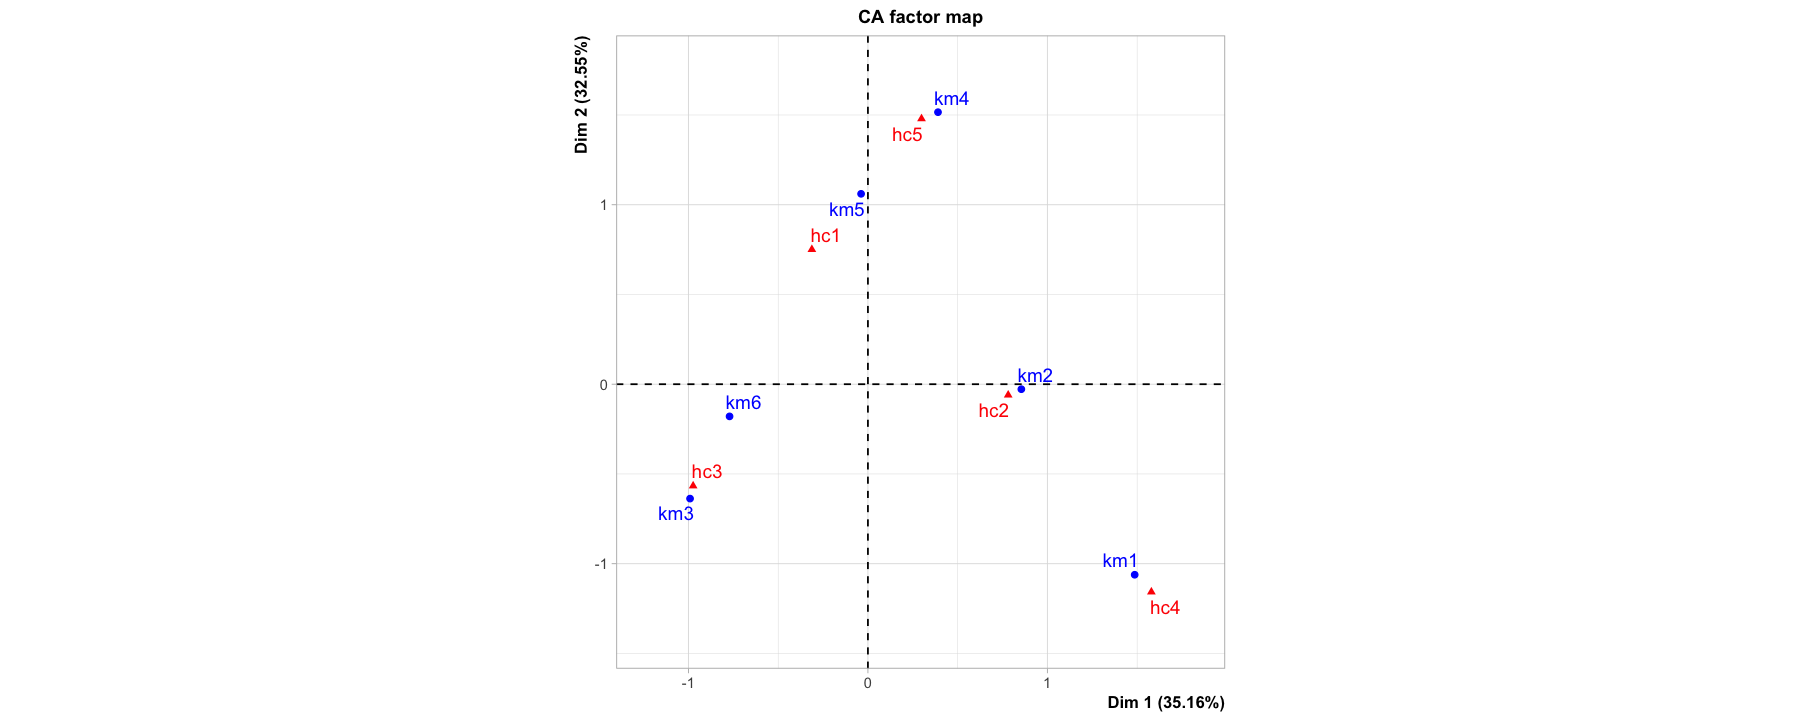

In [12]:
library(FactoMineR)
ca <- CA(tab)
ca

# Sociological data

We consider the dataset studied by the sociologist Pierre Bourdieu, presented in the textbook of Xavier Gendre,

https://www.math.univ-toulouse.fr/~xgendre/

about 8869 students. We know the parent job:

    EAG : Exploitant agricole
    SAG : Salarié agricole
    PT : Patron
    PLCS : Profession libérale & cadre supérieur
    CM : Cadre moyen
    EMP : Employé
    OUV : Ouvrier
    OTH : Autre

and the kind of studies of children:

    DR : Droit
    SCE : Sciences économiques
    LET : Lettres
    SC : Sciences
    MD : Médecine ou dentaire
    PH : Pharmacie
    PD : Pluridisciplinaire
    IUT : Institut Universitaire de Technologie

We want to investigate if there is a social reproductibility, i.e. if there is a link between the parent job and the kind of studies of the children.

**Q** Do a correspondence analysis. Conclusions?

**Q** Some levels have small frequencies. What consequence on the results? How to gather levels? Redo the correspondence analysis with the new levels.

**R** Some clusters seem to be linked, like MD and PCLS or IUT and EAG. MD and PCLS can means that doctors make baby doctors.

**R** In the case of PH whis has small frequencies, the correspondence analysis factor map show it quite far away from the other datas. By gathering MD and PH (which can seem logical because they are both health jobs), the MDPH level is now near the initial MD position, and so MDPH and PCLS seem linked.

In [13]:
T <- read.table("dataBourdieu.dat")
T

,DR,SCE,LET,SC,MD,PH,PD,IUT
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
EAG,80,36,134,99,65,28,11,58
SAG,6,2,15,6,4,1,1,4
PT,168,74,312,137,208,53,21,62
PLCS,470,191,806,400,876,164,45,79
CM,236,99,493,264,281,56,36,87
EMP,145,52,281,133,135,30,20,54
OUV,16,6,27,11,8,2,2,8
AUT,305,115,624,247,301,47,42,90


**Results of the Correspondence Analysis (CA)**
The row variable has  8  categories; the column variable has 8 categories
The chi square of independence between the two variables is equal to 326.8964 (p-value =  9.916057e-43 ).
*The results are available in the following objects:

   name              description                   
1  "$eig"            "eigenvalues"                 
2  "$col"            "results for the columns"     
3  "$col$coord"      "coord. for the columns"      
4  "$col$cos2"       "cos2 for the columns"        
5  "$col$contrib"    "contributions of the columns"
6  "$row"            "results for the rows"        
7  "$row$coord"      "coord. for the rows"         
8  "$row$cos2"       "cos2 for the rows"           
9  "$row$contrib"    "contributions of the rows"   
10 "$call"           "summary called parameters"   
11 "$call$marge.col" "weights of the columns"      
12 "$call$marge.row" "weights of the rows"         

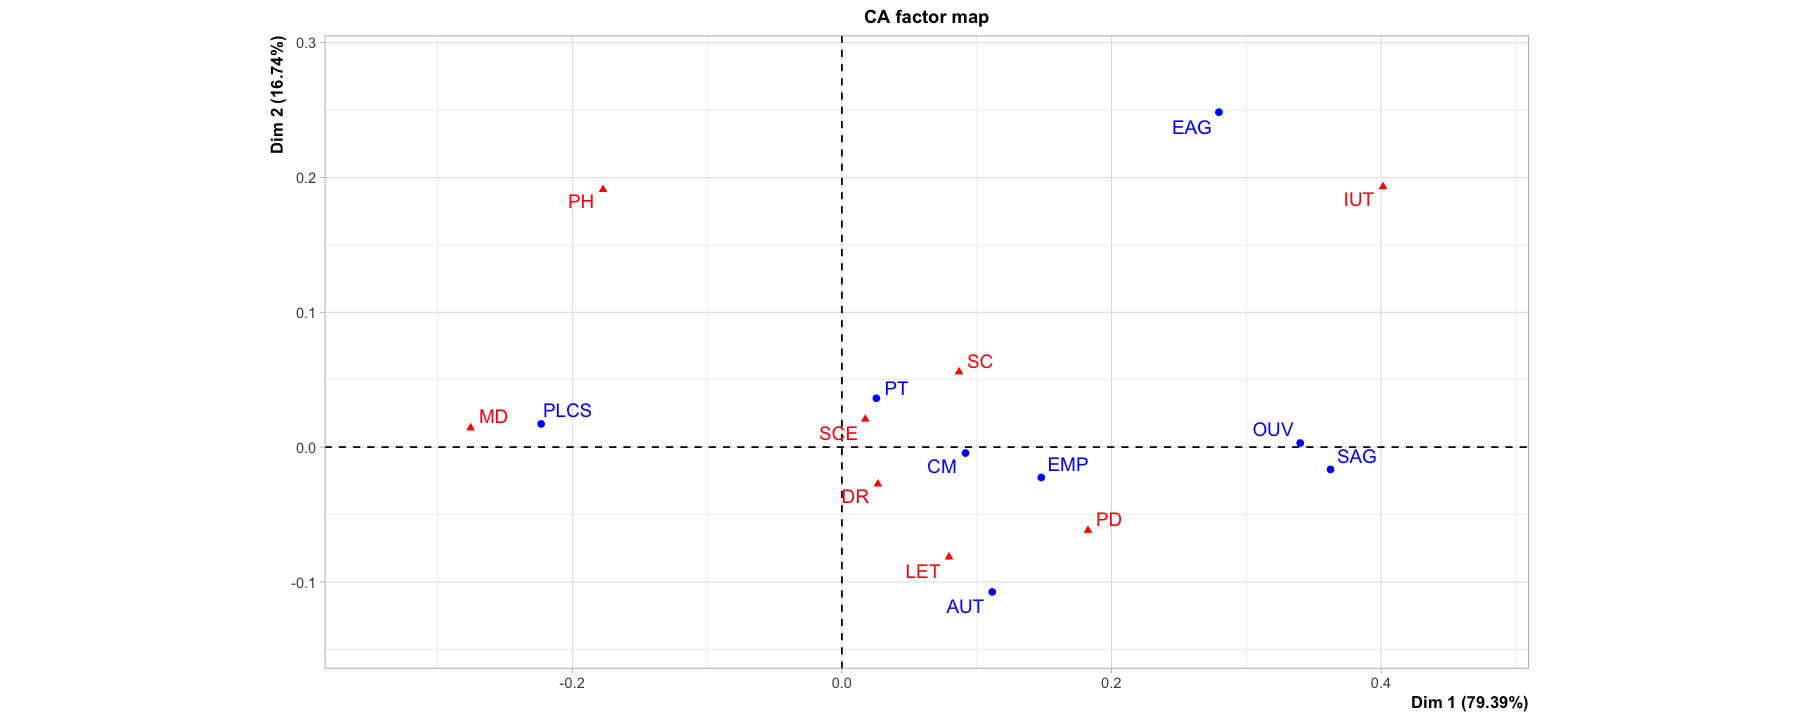

In [14]:
CA(T)

In [15]:
# Example for the levels Pharmacie and Medecine: 
T2 <- T
T2 <- cbind(T, MDPH = T[, "MD"] + T[, "PH"])  # gather levels MD and PH (columns 5 and 6)
T2 <- T2[, -c(5,6)]  # delete corresponding columns
T2

,DR,SCE,LET,SC,PD,IUT,MDPH
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
EAG,80,36,134,99,11,58,93
SAG,6,2,15,6,1,4,5
PT,168,74,312,137,21,62,261
PLCS,470,191,806,400,45,79,1040
CM,236,99,493,264,36,87,337
EMP,145,52,281,133,20,54,165
OUV,16,6,27,11,2,8,10
AUT,305,115,624,247,42,90,348


**Results of the Correspondence Analysis (CA)**
The row variable has  8  categories; the column variable has 7 categories
The chi square of independence between the two variables is equal to 312.8213 (p-value =  4.264595e-43 ).
*The results are available in the following objects:

   name              description                   
1  "$eig"            "eigenvalues"                 
2  "$col"            "results for the columns"     
3  "$col$coord"      "coord. for the columns"      
4  "$col$cos2"       "cos2 for the columns"        
5  "$col$contrib"    "contributions of the columns"
6  "$row"            "results for the rows"        
7  "$row$coord"      "coord. for the rows"         
8  "$row$cos2"       "cos2 for the rows"           
9  "$row$contrib"    "contributions of the rows"   
10 "$call"           "summary called parameters"   
11 "$call$marge.col" "weights of the columns"      
12 "$call$marge.row" "weights of the rows"         

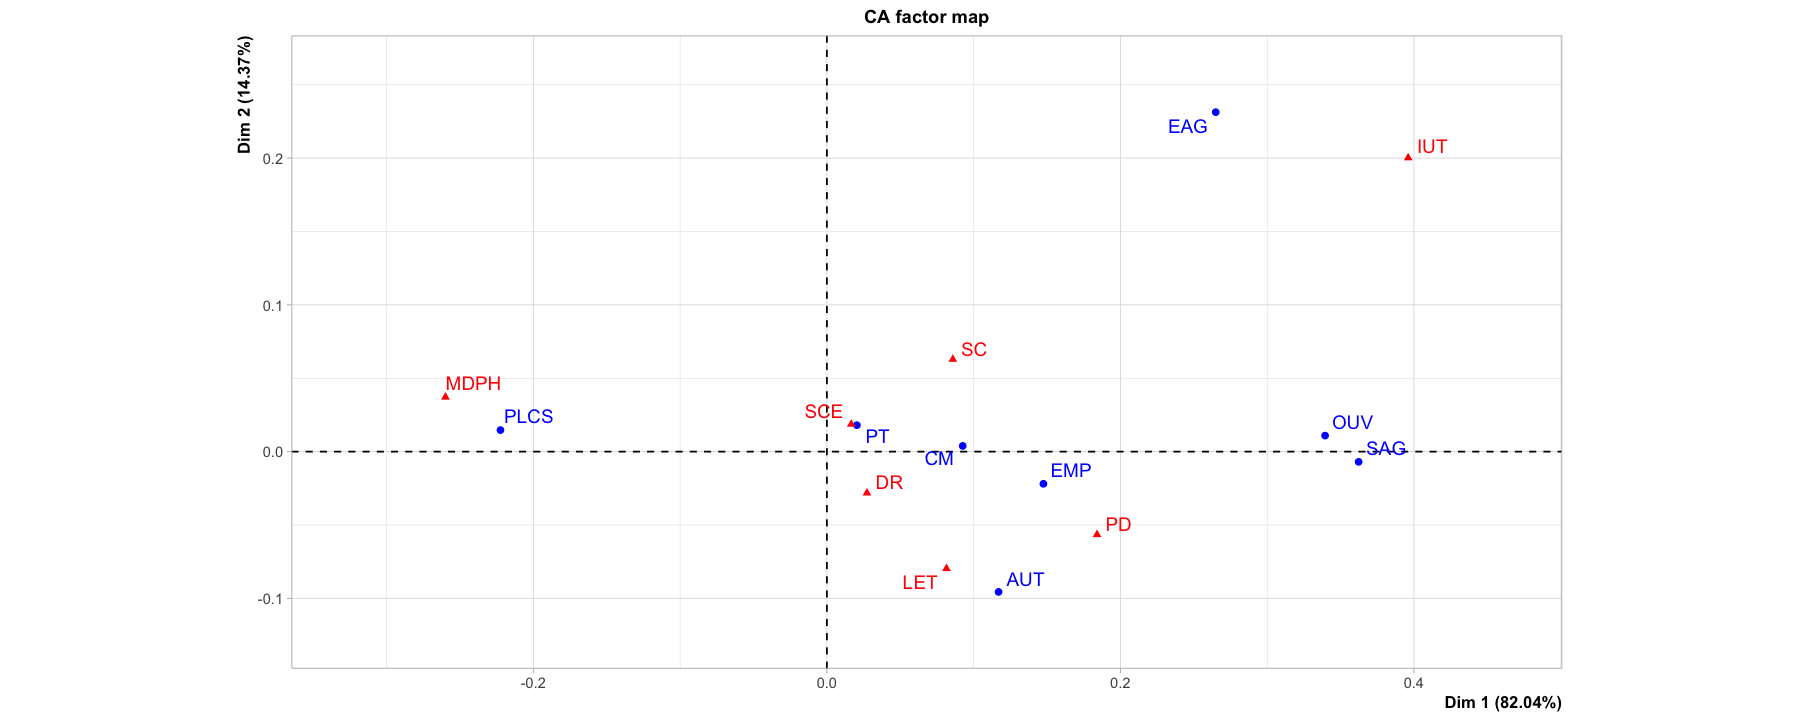

In [16]:
CA(T2)